In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

In [13]:
file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\13_week\AAME.csv"
df = pd.read_csv(file_path)

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [23]:
seq_data = (df[['Open']]).to_numpy()

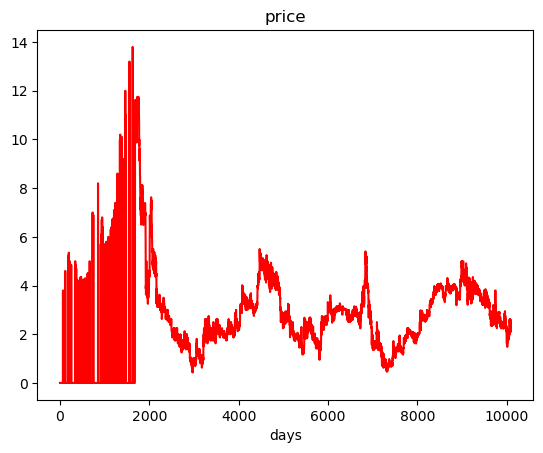

In [25]:
plt.plot(seq_data, color = 'red')
plt.title('price')
plt.xlabel('days')
plt.ylabel('')
plt.show()

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [34]:
from sklearn.preprocessing import MinMaxScaler

open_prices = df[['Open']].to_numpy()
scaler = MinMaxScaler()
open_scaled = scaler.fit_transform(open_prices)

In [36]:
def make_sequence(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = make_sequence(open_scaled, window_size)

In [38]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [44]:
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(window_size, 1)), 
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1)

Epoch 1/30


C:\Users\kimge\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0046 - val_loss: 3.8083e-05
Epoch 2/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0031 - val_loss: 1.7360e-04
Epoch 3/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0036 - val_loss: 6.8397e-05
Epoch 4/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0039 - val_loss: 1.3507e-04
Epoch 5/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0039 - val_loss: 3.8168e-05
Epoch 6/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0032 - val_loss: 1.6059e-04
Epoch 7/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0038 - val_loss: 9.5026e-05
Epoch 8/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0038 - val_loss: 4.1727e-05
Epoch 9/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0043 - val_loss: 1.1057e-04
Epoch 10/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0037 - val_loss: 3.1648e-05
Epoch 11/30
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0038 - val_loss: 4.0839e-05
Epoch 12/30
454/454

In [45]:
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [46]:
from sklearn.metrics import mean_squared_error

# 예측 (정규화된 상태)
y_pred = model.predict(X_test)

# 역변환 (원래 가격으로)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# MSE 계산
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
print(f"\n✅ Test MSE: {mse:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

✅ Test MSE: 0.0191


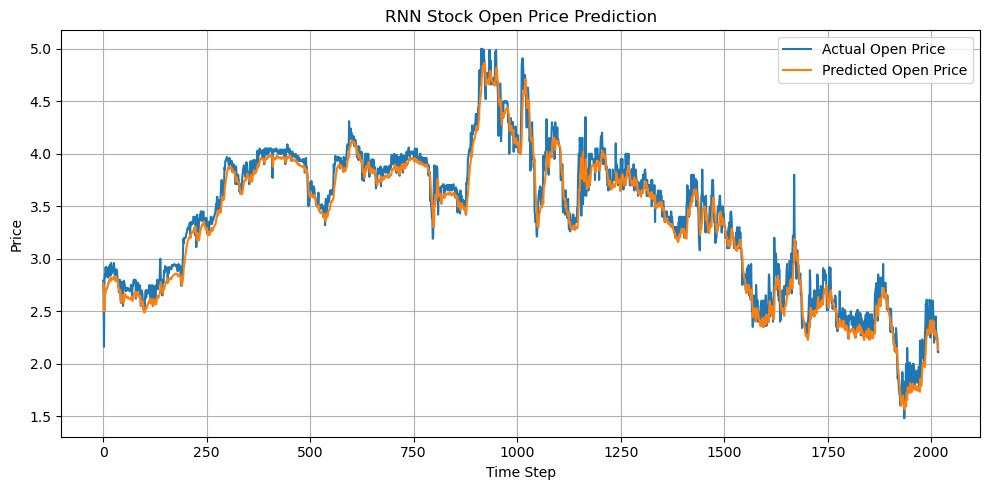

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inverse, label='Actual Open Price')
plt.plot(y_pred_inverse, label='Predicted Open Price')
plt.title('RNN Stock Open Price Prediction')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()